# Politic_ES

Análisis inicial de los datos

## Imports

In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Visualización

In [9]:
%matplotlib inline

c_gender = {'male': 'blue', 'female': 'pink'}
c_profession = {'politician': 'gray', 'celebrity': 'yellow', 'journalist': 'orange'}
c_i_bin = {'left': 'red', 'right': 'blue'}
c_i_mul = {'left': 'red', 'moderate_left': 'lightcoral', 'moderate_right': 'turquoise', 'right': 'blue'}

## Seed para repetición

In [10]:
seed = 69420
np.random.seed(seed)

## Dataset

In [2]:
df = pd.read_csv(os.path.join("../practise_data/", "politicES_phase_2_train_public.csv"))
df

,label,gender,profession,ideology_binary,ideology_multiclass,tweet
0,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,¡Feliz 28 de febrero a todas las andaluzas y a...
1,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,"Feliz año nuevo, feliz esperanza 💕. Querido 20..."
2,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,🇩🇪🇪🇸 ¡Un placer encontrarme con mi homólogo al...
3,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,El conflicto en Ucrania ha supuesto una dramát...
4,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,La Academia de la Llingua Asturiana realiza un...
...,...,...,...,...,...,...
179995,ffd89e81d6f6c783bfb72a4590db4304,male,politician,left,left,Desde un inicio nos opusimos a la escalda mili...
179996,ffd89e81d6f6c783bfb72a4590db4304,male,politician,left,left,En menos de 4 minutos he tratado de analizar e...
179997,ffd89e81d6f6c783bfb72a4590db4304,male,politician,left,left,Un fantasma recorre Euskal Herria y el Estado....
179998,ffd89e81d6f6c783bfb72a4590db4304,male,politician,left,left,Aquí os dejo mis reflexiones hoy en el diario ...


In [3]:
# Ordenamos las variables categóricas a nuestro gusto, principalmente por motivos visuales de izquierda a derecha
df.ideology_binary = pd.Categorical(df.ideology_binary, ['left', 'right'])
df.ideology_multiclass = pd.Categorical(df.ideology_multiclass, ['left', 'moderate_left', 'moderate_right', 'right'])

# Analysis de los datos obtenidos

In [4]:
df[["gender", "ideology_binary", "profession",  "label"]].groupby(["gender", "profession", "ideology_binary"]).count()

label
gender profession ideology_binary       
female celebrity  left              3040
                  right              640
       journalist left             22080
                  right            10720
       politician left             14240
                  right             9840
male   celebrity  left              3920
                  right             1440
       journalist left             36720
                  right            41280
       politician left             20400
                  right            15680

### Gender

Text(0.5, 1.0, 'Gender distribution')

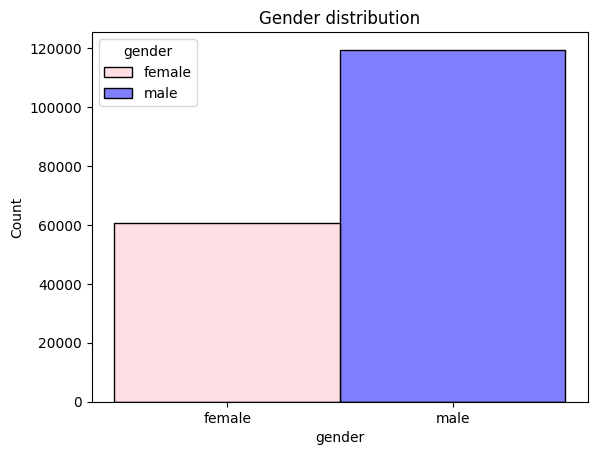

In [11]:
ax = sns.histplot(df, x="gender", hue="gender", palette=c_gender)
ax.set_title("Gender distribution")

### Profession

Text(0.5, 1.0, 'Profession distribution')

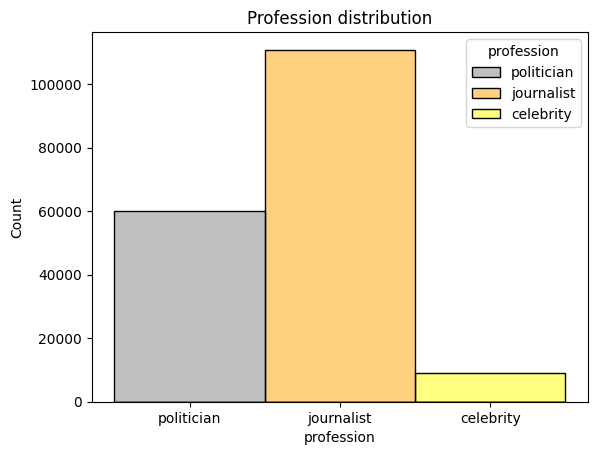

In [12]:
ax = sns.histplot(df, x="profession", hue="profession", palette=c_profession)
ax.set_title("Profession distribution")

### Ideology binary

Text(0.5, 1.0, 'Ideology binary distribution')

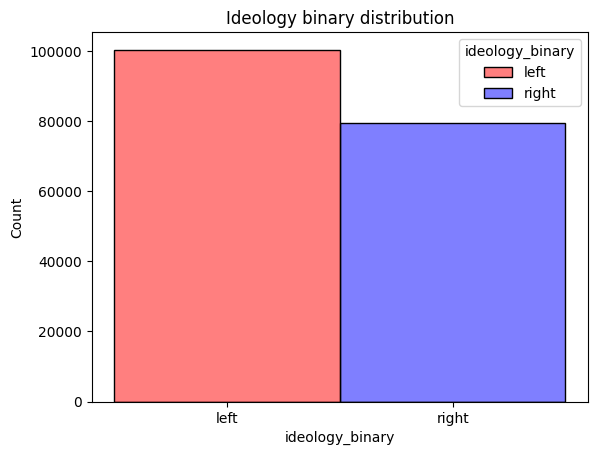

In [13]:
ax = sns.histplot(df, x="ideology_binary", hue="ideology_binary", palette=c_i_bin)
ax.set_title("Ideology binary distribution")

### Ideology multiclass

Text(0.5, 1.0, 'Ideology multiclass distribution')

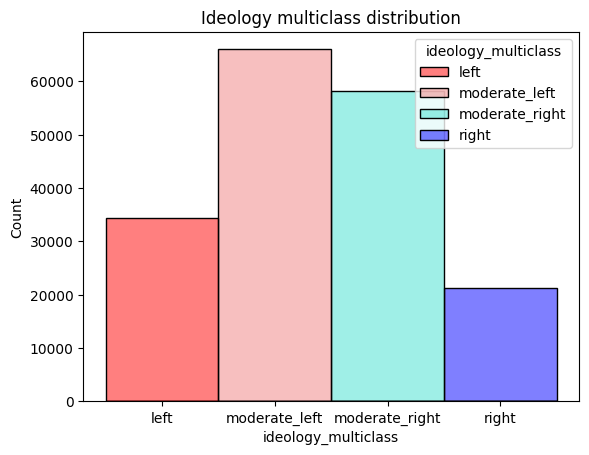

In [14]:
ax = sns.histplot(df, x="ideology_multiclass", hue="ideology_multiclass", palette=c_i_mul)
ax.set_title("Ideology multiclass distribution")

# Separación en train y test

In [15]:
# Separamos en training y en test
parte_test = 0.3
df_train, df_test = np.split(df, [int((1 - parte_test) * len(df))])

In [16]:
df_train

,label,gender,profession,ideology_binary,ideology_multiclass,tweet
0,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,¡Feliz 28 de febrero a todas las andaluzas y a...
1,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,"Feliz año nuevo, feliz esperanza 💕. Querido 20..."
2,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,🇩🇪🇪🇸 ¡Un placer encontrarme con mi homólogo al...
3,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,El conflicto en Ucrania ha supuesto una dramát...
4,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,La Academia de la Llingua Asturiana realiza un...
...,...,...,...,...,...,...
125994,b75a1185a34e920e0b23b9e87acde174,female,journalist,left,moderate_left,Pero qué cosa tan hermosa es este episodio sob...
125995,b75a1185a34e920e0b23b9e87acde174,female,journalist,left,moderate_left,@user vaya fichaje que han hecho estos maldito...
125996,b75a1185a34e920e0b23b9e87acde174,female,journalist,left,moderate_left,"Por si quedaban dudas, Lula ganó en el 'Ohio' ..."
125997,b75a1185a34e920e0b23b9e87acde174,female,journalist,left,moderate_left,Las ausencias de los máximos responsables polí...


In [17]:
df_test

,label,gender,profession,ideology_binary,ideology_multiclass,tweet
125999,b75a1185a34e920e0b23b9e87acde174,female,journalist,left,moderate_left,Qué petición tan simple la que hace la cantant...
126000,b764da399179ff2948719066391eaecf,female,journalist,right,moderate_right,"He ido a ver Cyrano de Bergerac, de la compañí..."
126001,b764da399179ff2948719066391eaecf,female,journalist,right,moderate_right,Brutal esta entrevista de ⁦@user ⁩ a a una ucr...
126002,b764da399179ff2948719066391eaecf,female,journalist,right,moderate_right,"Cuando llegué a Madrid, mi compañera de piso d..."
126003,b764da399179ff2948719066391eaecf,female,journalist,right,moderate_right,4/ Mientras algunos quieren presentar a Shakir...
...,...,...,...,...,...,...
179995,ffd89e81d6f6c783bfb72a4590db4304,male,politician,left,left,Desde un inicio nos opusimos a la escalda mili...
179996,ffd89e81d6f6c783bfb72a4590db4304,male,politician,left,left,En menos de 4 minutos he tratado de analizar e...
179997,ffd89e81d6f6c783bfb72a4590db4304,male,politician,left,left,Un fantasma recorre Euskal Herria y el Estado....
179998,ffd89e81d6f6c783bfb72a4590db4304,male,politician,left,left,Aquí os dejo mis reflexiones hoy en el diario ...


# CNN

In [18]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

y_train = df_train['ideology_binary'].tolist()
y_test = df_test['ideology_binary'].tolist()

LABELS = sorted(set(y_test))
print('Conjunto de etiquetas:', LABELS)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Conjunto de etiquetas: ['left', 'right']


In [19]:
X_train = df_train['tweet'].tolist()
X_test = df_test['tweet'].tolist()

In [20]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token = True)
tokenizer.fit_on_texts(X_train)
tokenizer.word_index[''] = 0

NUM_WORDS=len(tokenizer.word_index)
print("Tamaño del vocabulario ={}".format(NUM_WORDS))

from keras.utils import pad_sequences 

MAX_LEN=60

encoded_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen = MAX_LEN, padding='post')
encoded_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen = MAX_LEN, padding='post')

Tamaño del vocabulario =121789


In [21]:
import tensorflow as tf 
# asegurar que los experimentos se pueden reproducir
tf.random.set_seed(42)

tf.__version__

'2.12.0-rc0'

In [22]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\manfe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [23]:
import gensim.downloader as api
import numpy as np

model_we = api.load("glove-wiki-gigaword-50")
#model_we = api.load("word2vec-google-news-300")     #EMBED_SIZE = 300

EMBED_SIZE = 50

# creamos una matriz para los textos del conjunto de entrenamiento
embedding_matrix = np.zeros((NUM_WORDS, EMBED_SIZE))
for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = model_we[word]
        # word embedding para la palabra con índice i
        embedding_matrix[i] = embedding_vector
    except:
        #if word does not exist, we do not udpate the matrix
        pass

print('matriz creada')


matriz creada


In [24]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Conv1D, MaxPooling1D

model = Sequential()

model.add(Embedding(NUM_WORDS, EMBED_SIZE, 
                    input_length=MAX_LEN, weights=[embedding_matrix],))

model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
# Para clasificación binaria
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 50)            6089450   
                                                                 
 conv1d (Conv1D)             (None, 60, 128)           25728     
                                                                 
 conv1d_1 (Conv1D)           (None, 60, 64)            32832     
                                                                 
 conv1d_2 (Conv1D)           (None, 60, 32)            8224      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 30, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                        

In [25]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Para el entrenamiento después de 3 epochs sin el error en el conjunto de validación no mejora
earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

In [26]:
epochs = 10 
batch_size = 16 

# training
history=model.fit(encoded_train, y_train, 
                    validation_split=0.2,
                  batch_size=batch_size, epochs=epochs,
                  callbacks=[earlyStopping],
                  )

Epoch 1/10
6300/6300 [==============================] - 638s 101ms/step - loss: 0.6549 - accuracy: 0.5959 - val_loss: 0.6008 - val_accuracy: 0.6619
Epoch 2/10
6300/6300 [==============================] - 864s 137ms/step - loss: 0.5059 - accuracy: 0.7476 - val_loss: 0.6040 - val_accuracy: 0.6806
Epoch 3/10
6300/6300 [==============================] - 906s 144ms/step - loss: 0.3780 - accuracy: 0.8268 - val_loss: 0.6183 - val_accuracy: 0.6922
Epoch 4/10
6300/6300 [==============================] - 982s 156ms/step - loss: 0.2774 - accuracy: 0.8792 - val_loss: 0.7901 - val_accuracy: 0.6707


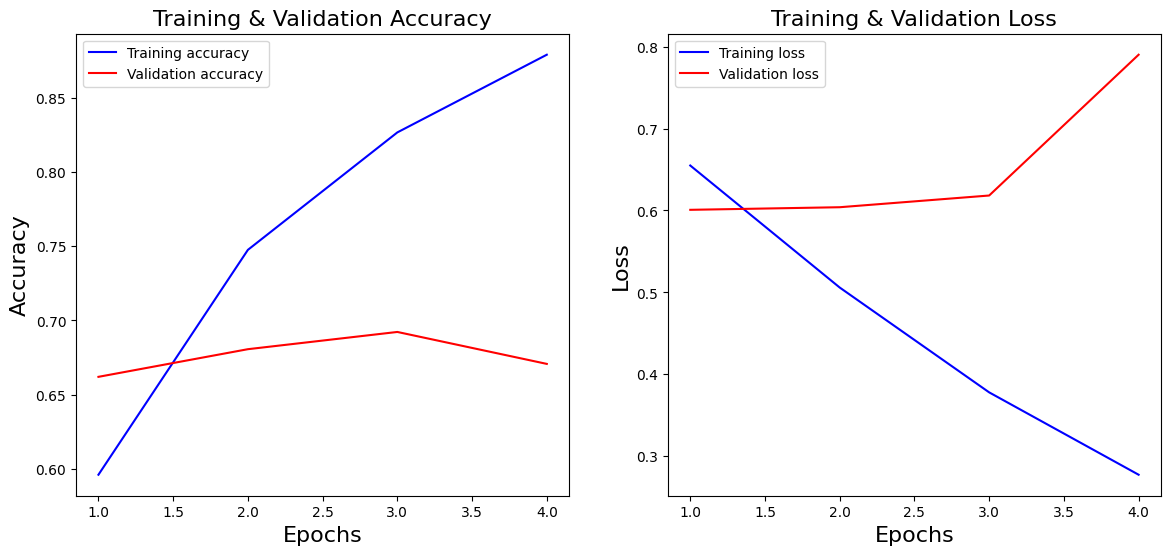

In [27]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Curva de a  the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'red', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'red', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [28]:
loss, accuracy = model.evaluate(encoded_test, y_test, batch_size=batch_size)

3376/3376 [==============================] - 20s 6ms/step - loss: 0.7954 - accuracy: 0.6702


In [29]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report 
y_pred = np.round(model.predict(encoded_test))

print('accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=LABELS))

1688/1688 [==============================] - 14s 8ms/step
accuracy: 0.6701542564026592
              precision    recall  f1-score   support

        left       0.75      0.63      0.68     30401
       right       0.60      0.72      0.66     23600

    accuracy                           0.67     54001
   macro avg       0.67      0.68      0.67     54001
weighted avg       0.68      0.67      0.67     54001



In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[19130 11271]
 [ 6541 17059]]


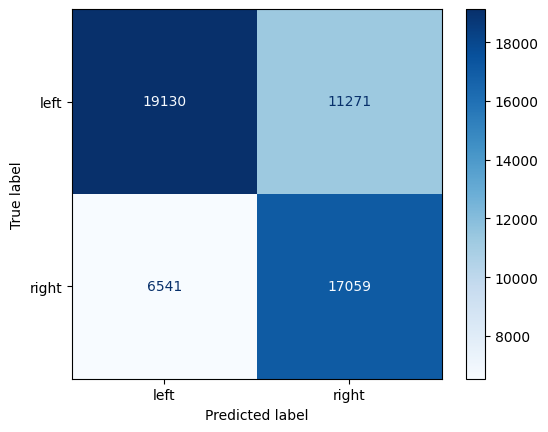

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=LABELS)
disp.plot(cmap=plt.cm.Blues,values_format='g')